# Expected Utility

Expected utility and certainty equivalent are two closely related concepts in decision theory, both aimed at assessing the value of a risky choice. Expected utility is the average utility of potential outcomes, weighted by their probabilities, providing a measure of the overall satisfaction or "happiness" one can expect from a risky choice. The certainty equivalent, on the other hand, is the amount of certain wealth that would make an individual indifferent between that certain amount and the risky choice. In essence, it is the risk-free value of the risky option.

When individuals have constant relative risk aversion (CRRA) preferences, the certainty equivalent can be calculated using a specific formula involving the risk aversion coefficient and the expected value and variance of the risky outcome. This formula provides a more precise measure of the value of the risky choice compared to the mean-variance approximation, a simpler method that assumes individuals only care about the mean and variance of the risky outcome.

To assess the accuracy of the mean-variance approximation, we can analyze the error it introduces under different assumptions. Assuming a normal distribution for the risky outcome allows us to calculate the exact certainty equivalent and compare it to the mean-variance approximation, quantifying the error under different levels of uncertainty. Additionally, using historical returns as a proxy for future uncertainty can introduce additional errors, the accuracy of which depends on the stability of the historical data and its ability to reflect future conditions.

By understanding the relationship between expected utility, certainty equivalent, and the mean-variance approximation, we can make more informed decisions in the face of risk.

## 1. Mean-variance approximation
We know that the certainty equivalent (CE) can be approximated as follows
$$\frac{CE_a}{W} = \mu_R - \frac{1}{2}\gamma\sigma_R^2$$
where $\mu_R$ and $\sigma_R$ are the mean and standard deviation of the return on wealth and $W$ is the current wealth. $\gamma$ is a measure of the relative risk aversion with respect to the patricular risky choice. Out of this approximation we derive the mean-variance preferences. However, the goodness of the approximation depends on whether the variance of returns is high (the higher the variance the worse is the approximation) and whether returns are normally distributed.

Let us examine the goodness of the approximation for the case of power utility (CRRA) prefernces and for various cases of risk distributions and variances. The CE in this case is given by:
$$\frac{CE}{W} = E(R^{1-\gamma})^{1/(1-\gamma)}\
$$.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Case 1: Normally Distributed Returns

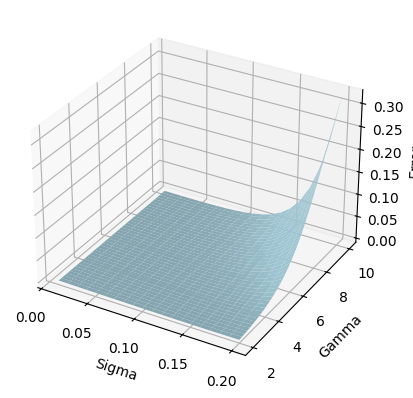

In [15]:
# Set the sharpe ratio

sr = 0.4

# Create vectors for the standard deviations and risk aversion coefficients
sigma = np.arange(0.01, 0.21, 0.01)
gamma = np.arange(2, 10.2, 0.2)
n_sigma = len(sigma)
n_gamma = len(gamma)

# Create an empty matrix for the error
error = np.empty((n_sigma, n_gamma))

# Generate standard normally distributed random numbers
e = np.random.normal(0, 1, 1000)

# Compute the error at all instances
for i in range(n_sigma):
    for j in range(n_gamma):
        # Approximate CE
        CEa = 1 + sigma[i] * (sr - 0.5 * gamma[j] * sigma[i])

        # Simulated Returns
        R = 1 + sr * sigma[i] + sigma[i] * e

        # Estimated CE with simulations
        CE = np.mean(R ** (1 - gamma[j])) ** (1 / (1 - gamma[j]))

        # Error
        error[i, j] = (CEa / CE) - 1

# 3D Plot (Matplotlib equivalent of `persp`)
from mpl_toolkits.mplot3d import Axes3D

sigma_grid, gamma_grid = np.meshgrid(sigma, gamma)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(sigma_grid, gamma_grid, error.T, color='lightblue', shade=True)
ax.set_xlabel('Sigma')
ax.set_ylabel('Gamma')
ax.set_zlabel('Error')
plt.show()


# 2 Historical Returns

In this case, instead of relying on the normal distribution to model the uncertainty, we employ historical simulation. This method leverages past market data to generate potential future scenarios. To create a set of possible scenarios, we bootstrap from the historical returns of the market portfolio. This involves randomly sampling with replacement from the historical data to construct simulated return sequences. In this example, we bootstrap 1000 scenarios.


By comparing the approximation error using bootstrapping to the error obtained under the normal distribution, we can assess the relative accuracy of each method. This comparison can highlight the potential biases or limitations of the normal distribution assumption in certain contexts.

Finally, we can visualize the certainty equivalents computed using each of the three methods: historical simulation with bootstrapping, historical simulation without bootstrapping, and the normal distribution. This visual representation provides a clear comparison of the results and helps identify any significant differences or patterns.





In [16]:
# Set the working directory
os.chdir("C:\\Users\\henrik.knudsen\\OneDrive - BI Norwegian Business School (BIEDU)\\Desktop\\BI-Skole\\3 Semester\\Strategic Asset\\Homework_tasks")

# Import the data
data = pd.read_csv(".\\1\\test_data.csv")

Mean = 1.02%, St.dev.= 4.39%


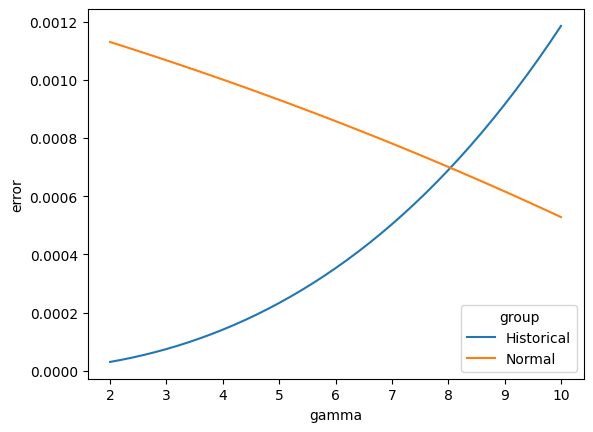

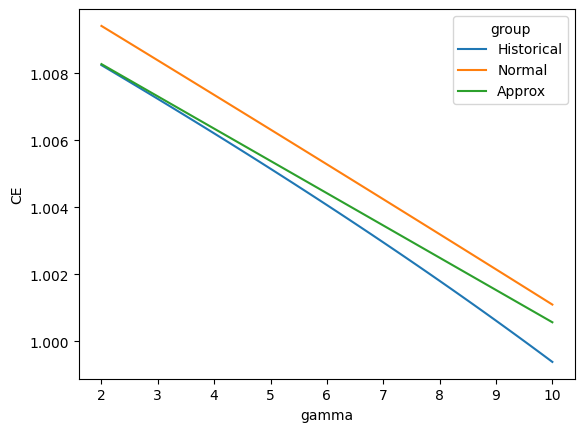

In [17]:
mrk_ret = data.iloc[:, 1] / 100  # Assuming the second column contains the returns

# Generate a historical random sample and compute the mean and variance
hist_ret = np.random.choice(mrk_ret, size=1000, replace=True)
mean_ret = np.mean(hist_ret)
var_ret = np.var(hist_ret)
print(f"Mean = {mean_ret*100:.2f}%, St.dev.= {np.sqrt(var_ret)*100:.2f}%")

# Generate normally distributed returns with the same mean and stdev
norm_ret = mean_ret + np.sqrt(var_ret) * e

# Compute the error for various values of gamma
CE_hist = np.empty(n_gamma)
CE_norm = np.empty(n_gamma)
CEa = np.empty(n_gamma)

for i in range(n_gamma):
    # Approximate CE
    CEa[i] = 1 + mean_ret - 0.5 * gamma[i] * var_ret

    # Estimated CE with simulated returns
    CE_hist[i] = np.mean((1 + hist_ret) ** (1 - gamma[i])) ** (1 / (1 - gamma[i]))
    CE_norm[i] = np.mean((1 + norm_ret) ** (1 - gamma[i])) ** (1 / (1 - gamma[i]))

# Calculate errors
error_hist = (CEa / CE_hist) - 1
error_norm = (CEa / CE_norm) - 1

# Plot errors
df = pd.DataFrame({
    'x': np.tile(gamma, 2),
    'y': np.concatenate((np.abs(error_hist), np.abs(error_norm))),
    'group': ['Historical'] * len(gamma) + ['Normal'] * len(gamma)
})

sns.lineplot(data=df, x='x', y='y', hue='group')
plt.xlabel('gamma')
plt.ylabel('error')
plt.show()

# Plot CE comparison
df_ce = pd.DataFrame({
    'x': np.tile(gamma, 3),
    'y': np.concatenate((CE_hist, CE_norm, CEa)),
    'group': ['Historical'] * len(gamma) + ['Normal'] * len(gamma) + ['Approx'] * len(gamma)
})

sns.lineplot(data=df_ce, x='x', y='y', hue='group')
plt.xlabel('gamma')
plt.ylabel('CE')
plt.show()